## Simulation of Hospital Management System using Imaginary Patients Dataset

### First

**Generate imaginary dataset within some time interval**.

```dataset_generate.py AVG_STAY NUM_PATIENTS START_MONTH END_MONTH
```

In [1]:
%run src/dataset_generate.py 4 2000 2 3

generated patients dataset and wrote output into: 
	patients-data.csv


**Verify consistency of the generated dataset**

In [2]:
%run src/dataset_verify.py

2000 patients were admitted.
10.60% admitted into IC Rooms (total 212)
4.07 day(s) is the average stay of a patient.


<hr>

In [3]:
%matplotlib inline

### Second
Exploring the patients dataset<br>

In [4]:
import src.patient_data as patients

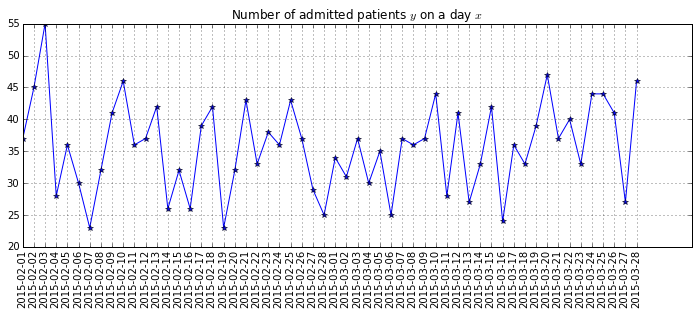

In [5]:
patients.plot_admit_per_day()

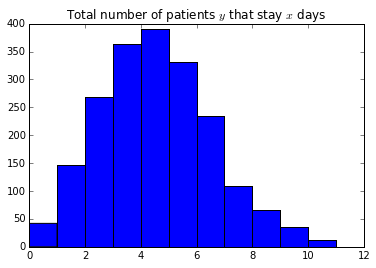

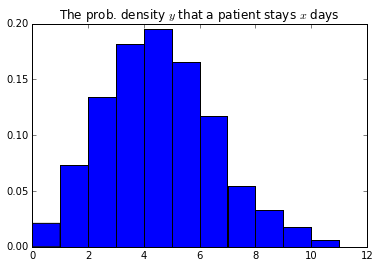

notice the mean of the distribution is approximately = 2, which was originally used in poisson.rvs(mu=2, size=1) to generate the random length of stay in the dataset.


In [6]:
patients.plot_stay_density()

**Example on exploring the data** <br>

In [7]:
for i in set(data.DaysStay):
    l = len(data[data.DaysStay == i])
    print('{} patients stayed for {} day.'.format(l, i))

42 patients stayed for 0 day.
147 patients stayed for 1 day.
269 patients stayed for 2 day.
363 patients stayed for 3 day.
391 patients stayed for 4 day.
331 patients stayed for 5 day.
234 patients stayed for 6 day.
109 patients stayed for 7 day.
66 patients stayed for 8 day.
35 patients stayed for 9 day.
8 patients stayed for 10 day.
5 patients stayed for 11 day.


<hr>

# Third
process dataset to aggregate information per daily ticks. 

In [8]:
%matplotlib inline

In [9]:
%run src/process_data.py

processed the per-individual patients dataset:
	patients-data.csv
and wrote aggregated new dataset into:
	daily-ticks.csv


**read new dat**

In [10]:
daily = pd.DataFrame.from_csv('daily-ticks.csv', index_col=False)

## plot daily ticks with total patients in the hospital

In [13]:
daily_data = daily

def plot_overall_report():
    plt.figure(figsize=(12,4))

    x = daily_data.Date
    y = daily_data.OverallTotal
    y2 = daily_data.ICUroomTotal
    y3 = daily_data.InPatients
    y4 = daily_data.OutPatients

    plt.plot(y3, '-*', label='Admitted into hospital')
    plt.plot(y, '-o', label='Total patients in hosptial')
    plt.plot(y2, '-x', label='Total patients in ICU room')
    plt.plot(y4, '-^', label='Leaving hospital')


    plt.xlabel('Date')
    plt.ylabel('Number of patients')
    plt.xticks(range(len(x)), x, rotation = 90)
    plt.text(60, 10, 'Note: patients in ICU are included in Total patients.')
    plt.legend(bbox_to_anchor = (1.4, 1));plt.grid();plt.show()

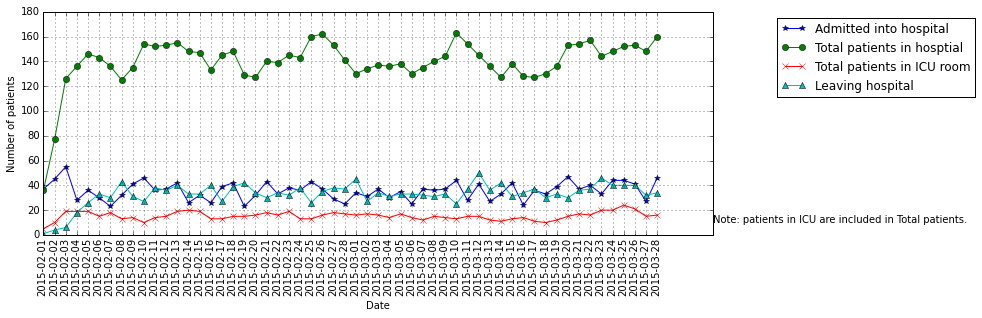

In [14]:
plot_overall_report()

<hr>

## Data verification

In [15]:
daily_data[:2]

,Date,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
0,2015-02-01,37,1,5,0,5,36
1,2015-02-02,45,4,5,0,10,77


#### How many patients got into an ICU room at a given day:

In [16]:
print len( data[ (data.AdmitDay == '2015-03-01') & (data.ICRoom == 'yes') ] )
print len( data[ (data.AdmitDay == '2015-03-02') & (data.ICRoom == 'yes') ] )

3
6


#### How many patients left from an ICU room at a given day:

In [17]:
print len( data[ (data.LeaveDay == '2015-03-01') & (data.ICRoom == 'yes') ] )
print len( data[ (data.LeaveDay == '2015-03-02') & (data.ICRoom == 'yes') ] )

4
5


#Forth

In [18]:
import numpy as np

see: http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%206%20-%20String%20Operations-%20Which%20month%20was%20the%20snowiest.ipynb

In [30]:
dailydata = pd.read_csv('daily-ticks.csv', parse_dates=True, index_col='Date')

In [24]:
dailydata = pd.DataFrame.from_csv('daily-ticks.csv', parse_dates=True, index_col='Date')

In [31]:
dailydata[:2]

,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
Date,,,,,,
2015-02-01,37,1,5,0,5,36
2015-02-02,45,4,5,0,10,77


In [32]:
dailydata[dailydata.index == '2015-03-02']

,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
Date,,,,,,
2015-03-02,31,27,6,5,17,134


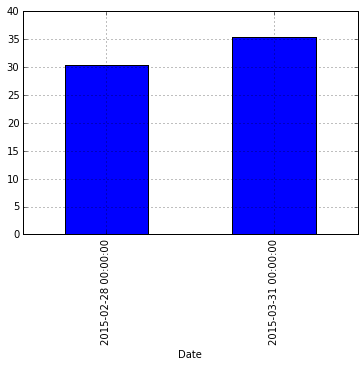

In [33]:
dailydata.OutPatients.resample('M').plot(kind='bar')

<hr>

http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%204%20-%20Find%20out%20on%20which%20weekday%20people%20bike%20the%20most%20with%20groupby%20and%20aggregate.ipynb

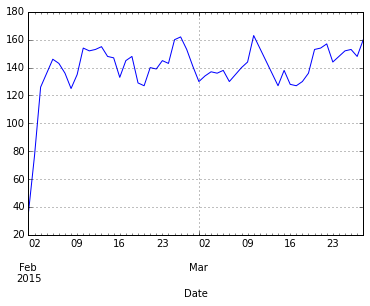

In [35]:
dailies = pd.read_csv('daily-ticks.csv', parse_dates=['Date'], index_col='Date', dayfirst=True)
dailies['OverallTotal'].plot()

In [36]:
dailies[:3]

,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
Date,,,,,,
2015-02-01,37,1,5,0,5,36
2015-02-02,45,4,5,0,10,77
2015-02-03,55,6,9,0,19,126


In [37]:
# box info
c = 'OverallTotal'
print dailies[c].max()
print dailies[c].median()
print dailies[c].min()

163
142.0
36


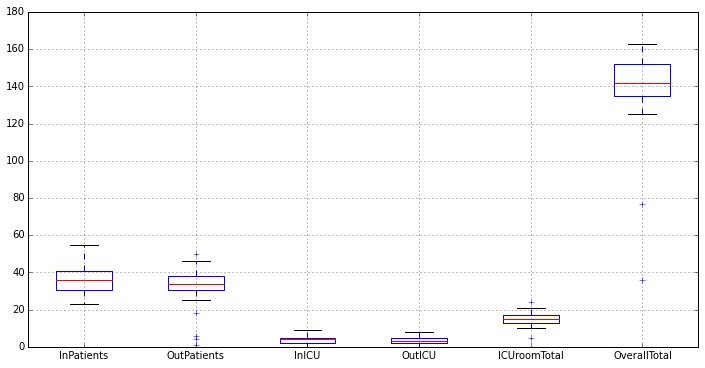

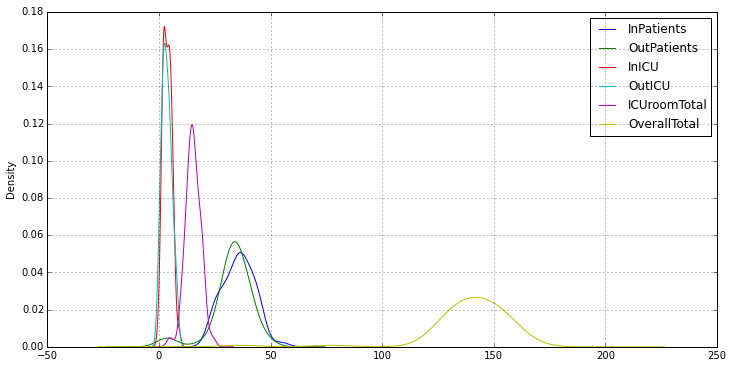

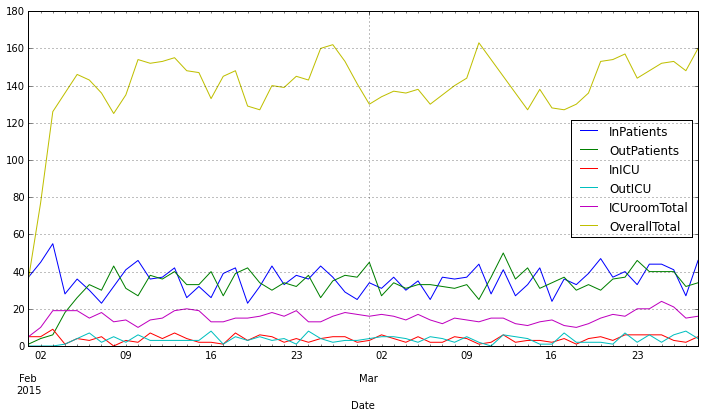

In [38]:
dailies.plot(kind='box', figsize=(12,6))
dailies.plot(kind='kde', figsize=(12,6))
dailies.plot(kind='line', figsize=(12,6), grid=True)

In [133]:
dailies.plot?

# Dataset

health datasets from NYC open data:
https://nycopendata.socrata.com/data?browseSearch=&scope=&agency=&cat=health&type=datasets


large health datasets http://www.ehdp.com/vitalnet/datasets.htm

HealthData.gov http://hub.healthdata.gov/dataset

health http://hcupnet.ahrq.gov

health care databases:
http://www.hcup-us.ahrq.gov

len of stay http://www.hcup-us.ahrq.gov/sidoverview.jsp#data